In [ ]:
# Import the relevant modules (libraries/packages)

import numpy as np
import pandas as pd
import re
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import string
import nltk
import requests
from bs4 import BeautifulSoup
import random
from wordcloud import WordCloud
import os
import spacy

import warnings

warnings.filterwarnings("ignore")

In [ ]:
# Installing the package pattern

!pip install pattern

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.2/22.2 MB 63.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.1/88.1 kB 11.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.1/81.1 kB 11.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 99.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 105.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 348.4/348.4 kB 1.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.6/100.6 kB 15.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pattern: filename=Pattern-3.6-py3-none-any.whl size=22332718 sha256=86c32e70157cf5473a899089235dc51880b2592ee825fdd38497c8039f9c8bf7
  Stored in director

In [ ]:
# Spacy makes it easy to build systems for information extraction.

import spacy
nlp = spacy.load('en_core_web_sm')
from textblob import TextBlob

from pattern.en import sentiment

In [ ]:
# Use request package to make a GET request for the website.

req =requests.get('https://www.forbes.com/sites/madhukarpai/2022/07/28/young-climate-justice-activists-are-fighting-for-our-collective-survival/?sh=168760d9798e')

In [ ]:
# using the correct encoding of html page

req.encoding = 'utf-8'

In [ ]:
# Extract the html
html = req.text

In [ ]:
# Printing the first 100 characters in html
print(html[:1000])

<!DOCTYPE html><html lang="en"><head><link rel="preload" as="font" href="https://i.forbesimg.com/assets/fonts/merriweather/merriweather-bold-webfont.woff2" type="font/woff2" crossorigin><link rel="preload" as="font" href="https://i.forbesimg.com/assets/fonts/work-sans/worksans-regular-webfont.woff2" type="font/woff2" crossorigin><script>window.ga=window.ga||function(){(ga.q=ga.q||[]).push(arguments)};ga.l=+new Date;</script><script type="text/javascript" async src="https://www.google-analytics.com/analytics.js"></script><script type="text/javascript" async src="//imasdk.googleapis.com/js/sdkloader/ima3.js"></script><script type="text/javascript" async src="https://www.gstatic.com/readaloud/forbes/player/web/api/js/api.js"></script><title>Young Climate Justice Activists Are Fighting For Our Collective Survival</title><meta charset="utf-8"><meta http-equiv="Content-Language" content="en_US"><link rel="shortcut icon" href="https://i.forbesimg.com/48X48-F.png"><meta name="referrer" content

In [ ]:
# Create a BeautifulSoup object
soup = BeautifulSoup(html)

In [ ]:
# Get the text out of the soup
text = soup.get_text()

In [ ]:
len(text)

22836

In [ ]:
# See some text

print(text[:2000])

Young Climate Justice Activists Are Fighting For Our Collective SurvivalSubscribe to newslettersSubscribe Sign InBETAThis is a BETA experience. You may opt-out by clicking hereMore From ForbesMay 5, 2023,12:12pm EDTDonanemab’s Data Look Promising, But It Won’t Lead To An Imminent Change In Medicare’s Severe Restrictions On Coverage Of Alzheimer’s Disease BiologicsMay 5, 2023,10:38am EDTFelled By A Warming World: Will Malaria Be The Next Pandemic?May 5, 2023,06:45am EDTCigna Profits Eclipse $1.2 Billion While Adding 1.5 Million New Health Plan MembersMay 4, 2023,05:49pm EDTComing To Terms With The Healthcare Industry’s Inauthenticity EpidemicMay 4, 2023,05:05pm EDTAlignment Healthcare Loss Narrows As Medicare Advantage Enrollment GrowsMay 4, 2023,10:17am EDTDutch Researchers Suggest Women Consider Waiting A Bit After Stopping The Pill Before Getting PregnantMay 4, 2023,09:58am EDTCovid-19 Emergency Declarations End May 11, What You Need To KnowMay 3, 2023,08:01pm EDTCentene Makeover Con

In [ ]:
# Show the entire text

text

'Young Climate Justice Activists Are Fighting For Our Collective SurvivalSubscribe to newslettersSubscribe Sign InBETAThis is a BETA experience. You may opt-out by\xa0clicking hereMore From ForbesMay 5, 2023,12:12pm EDTDonanemab’s Data Look Promising, But It Won’t Lead To An Imminent Change In Medicare’s Severe Restrictions On Coverage Of Alzheimer’s Disease BiologicsMay 5, 2023,10:38am EDTFelled By A Warming World: Will Malaria Be The Next Pandemic?May 5, 2023,06:45am EDTCigna Profits Eclipse $1.2 Billion While Adding 1.5 Million New Health Plan MembersMay 4, 2023,05:49pm EDTComing To Terms With The Healthcare Industry’s Inauthenticity EpidemicMay 4, 2023,05:05pm EDTAlignment Healthcare Loss Narrows As Medicare Advantage Enrollment GrowsMay 4, 2023,10:17am EDTDutch Researchers Suggest Women Consider Waiting A Bit After Stopping The Pill Before Getting PregnantMay 4, 2023,09:58am EDTCovid-19 Emergency Declarations End May 11, What You Need To KnowMay 3, 2023,08:01pm EDTCentene Makeover

In [ ]:
clean_text= text.replace("\n", " ")

In [ ]:
clean_text= clean_text.replace("/", " ")

In [ ]:
clean_text= ''.join([c for c in clean_text if c != "\'"])

In [ ]:
clean_text

'Young Climate Justice Activists Are Fighting For Our Collective SurvivalSubscribe to newslettersSubscribe Sign InBETAThis is a BETA experience. You may opt-out by\xa0clicking hereMore From ForbesMay 5, 2023,12:12pm EDTDonanemab’s Data Look Promising, But It Won’t Lead To An Imminent Change In Medicare’s Severe Restrictions On Coverage Of Alzheimer’s Disease BiologicsMay 5, 2023,10:38am EDTFelled By A Warming World: Will Malaria Be The Next Pandemic?May 5, 2023,06:45am EDTCigna Profits Eclipse $1.2 Billion While Adding 1.5 Million New Health Plan MembersMay 4, 2023,05:49pm EDTComing To Terms With The Healthcare Industry’s Inauthenticity EpidemicMay 4, 2023,05:05pm EDTAlignment Healthcare Loss Narrows As Medicare Advantage Enrollment GrowsMay 4, 2023,10:17am EDTDutch Researchers Suggest Women Consider Waiting A Bit After Stopping The Pill Before Getting PregnantMay 4, 2023,09:58am EDTCovid-19 Emergency Declarations End May 11, What You Need To KnowMay 3, 2023,08:01pm EDTCentene Makeover

In [ ]:
# Get the sentences

sentence=[]


tokens = nlp(clean_text)
for sent in tokens.sents:
    sentence.append((sent.text.strip()))

In [ ]:
sentence

['Young Climate Justice Activists Are Fighting For Our Collective SurvivalSubscribe to newslettersSubscribe Sign InBETAThis is a BETA experience.',
 'You may opt-out by\xa0clicking hereMore From ForbesMay 5, 2023,12:12pm EDTDonanemab’s Data Look Promising, But It Won’t Lead To An Imminent Change In Medicare’s Severe Restrictions On Coverage Of Alzheimer’s Disease BiologicsMay 5, 2023,10:38am EDTFelled By A Warming World: Will Malaria Be The Next Pandemic?May 5, 2023,06:45am EDTCigna Profits Eclipse $1.2 Billion While Adding 1.5 Million New Health Plan MembersMay 4, 2023,05:49pm EDTComing To Terms With The Healthcare Industry’s Inauthenticity EpidemicMay 4, 2023,05:05pm EDTAlignment Healthcare Loss Narrows',
 'As Medicare Advantage Enrollment GrowsMay 4, 2023,10:17am EDTDutch Researchers Suggest Women Consider Waiting A Bit After Stopping The Pill Before Getting PregnantMay 4, 2023,09:58am EDTCovid-19 Emergency Declarations End May 11, What You Need To KnowMay 3, 2023,08:01pm EDTCentene

In [ ]:
print(len(sentence))

184


In [ ]:
# Get the first sentence

print(sentence[0])

Young Climate Justice Activists Are Fighting For Our Collective SurvivalSubscribe to newslettersSubscribe Sign InBETAThis is a BETA experience.


In [ ]:
# Using TextBlob
textblob_sentiment=[]

for s in sentence:
    txt= TextBlob(s)
    a= txt.sentiment.polarity
    b= txt.sentiment.subjectivity
    
    textblob_sentiment.append([s,a,b])

In [ ]:
df_textblob = pd.DataFrame(textblob_sentiment, columns =['Sentence', 'Polarity', 'Subjectivity']) 

In [ ]:
df_textblob.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 184 entries, 0 to 183
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Sentence      184 non-null    object 
 1   Polarity      184 non-null    float64
 2   Subjectivity  184 non-null    float64
dtypes: float64(2), object(1)
memory usage: 4.4+ KB


Polarity is between -1 (extreme negative), 0 (neutral) and 1 (extreme positive

Subjectivity is from 0 to 1, where 1 is extremely subjective

In [ ]:
df_textblob.head(20)

,Sentence,Polarity,Subjectivity
0,Young Climate Justice Activists Are Fighting F...,0.100000,0.400000
1,You may opt-out by clicking hereMore From Forb...,0.112121,0.318182
2,"As Medicare Advantage Enrollment GrowsMay 4, 2...",0.000000,1.000000
3,"I write about global health, infectious diseas...",0.000000,0.000000
4,Got it!Share to FacebookShare to TwitterShare ...,0.050000,0.050000
5,"[+] climate change, called ""Climate Justice No...",0.000000,0.000000
6,"The rally included performing skits, dance, dr...",0.000000,0.000000
7,AFP PHOTO RAJESH JANTILAL (Photo credit shou...,0.000000,0.000000
8,Climate change is a code red for humankind.,0.000000,0.000000
9,But politicians and world leaders are yet to t...,0.266667,0.416667


Text(0.5, 9.444444444444438, 'Sentence Polarity (Textblob)')

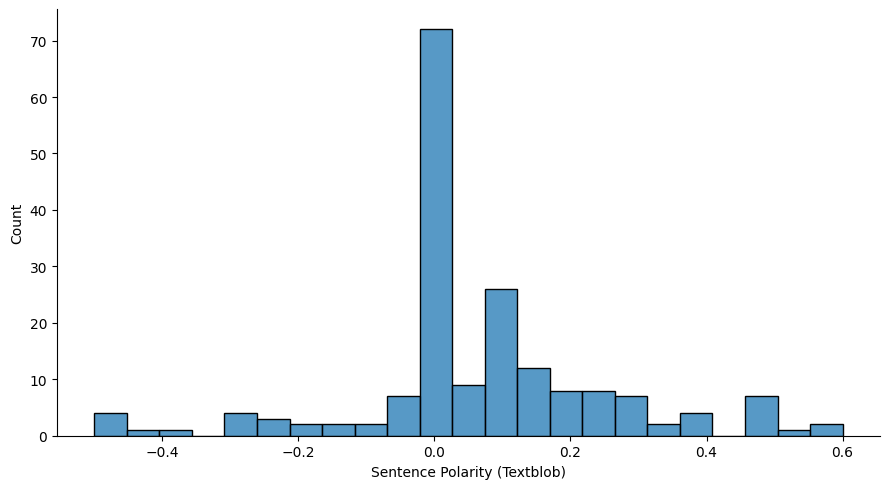

In [ ]:
sns.displot(df_textblob["Polarity"], height= 5, aspect=1.8)
plt.xlabel("Sentence Polarity (Textblob)")

Text(0.5, 9.444444444444438, 'Sentence Subjectivity (Textblob)')

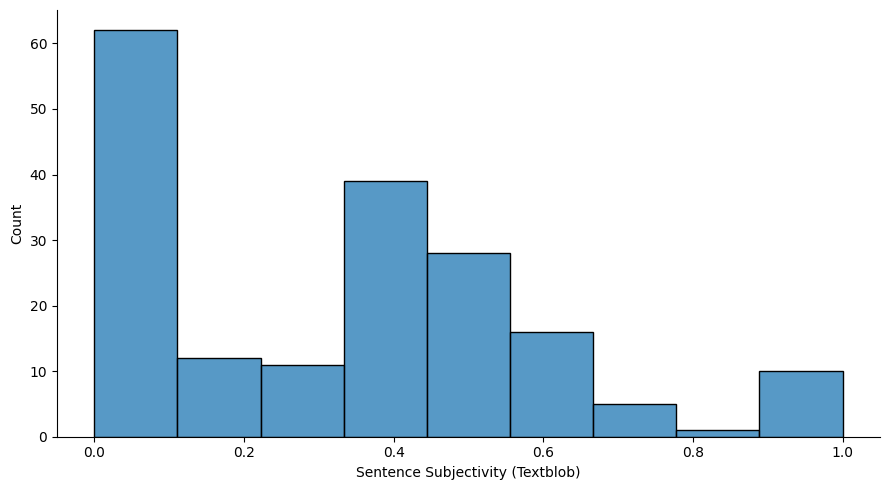

In [ ]:
sns.displot(df_textblob["Subjectivity"], height= 5, aspect=1.8)
plt.xlabel("Sentence Subjectivity (Textblob)")

In [ ]:
# Word cloud

clean_text[100:800]

'cribe Sign InBETAThis is a BETA experience. You may opt-out by\xa0clicking hereMore From ForbesMay 5, 2023,12:12pm EDTDonanemab’s Data Look Promising, But It Won’t Lead To An Imminent Change In Medicare’s Severe Restrictions On Coverage Of Alzheimer’s Disease BiologicsMay 5, 2023,10:38am EDTFelled By A Warming World: Will Malaria Be The Next Pandemic?May 5, 2023,06:45am EDTCigna Profits Eclipse $1.2 Billion While Adding 1.5 Million New Health Plan MembersMay 4, 2023,05:49pm EDTComing To Terms With The Healthcare Industry’s Inauthenticity EpidemicMay 4, 2023,05:05pm EDTAlignment Healthcare Loss Narrows As Medicare Advantage Enrollment GrowsMay 4, 2023,10:17am EDTDutch Researchers Suggest Women C'

In [ ]:
clean_text

'Young Climate Justice Activists Are Fighting For Our Collective SurvivalSubscribe to newslettersSubscribe Sign InBETAThis is a BETA experience. You may opt-out by\xa0clicking hereMore From ForbesMay 5, 2023,12:12pm EDTDonanemab’s Data Look Promising, But It Won’t Lead To An Imminent Change In Medicare’s Severe Restrictions On Coverage Of Alzheimer’s Disease BiologicsMay 5, 2023,10:38am EDTFelled By A Warming World: Will Malaria Be The Next Pandemic?May 5, 2023,06:45am EDTCigna Profits Eclipse $1.2 Billion While Adding 1.5 Million New Health Plan MembersMay 4, 2023,05:49pm EDTComing To Terms With The Healthcare Industry’s Inauthenticity EpidemicMay 4, 2023,05:05pm EDTAlignment Healthcare Loss Narrows As Medicare Advantage Enrollment GrowsMay 4, 2023,10:17am EDTDutch Researchers Suggest Women Consider Waiting A Bit After Stopping The Pill Before Getting PregnantMay 4, 2023,09:58am EDTCovid-19 Emergency Declarations End May 11, What You Need To KnowMay 3, 2023,08:01pm EDTCentene Makeover

In [ ]:
# Create tokenizer
tokenizer = nltk.tokenize.RegexpTokenizer('\w+, 0-9, d+')

In [ ]:
# Converting the sentence into words WORD TOKENIZE

from nltk.tokenize import word_tokenize

In [ ]:
 nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
justice = word_tokenize(clean_text)

In [ ]:
justice = [word for word in justice if word.isalnum()]

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
from nltk.corpus import stopwords

In [ ]:
stopwords = set(stopwords.words('english'))

In [ ]:
justice = [word for word in justice if not str.lower(word) in stopwords]

In [ ]:
# Check the frequency and probabilities
from nltk.probability import FreqDist

In [ ]:
word_frequency = FreqDist(justice)

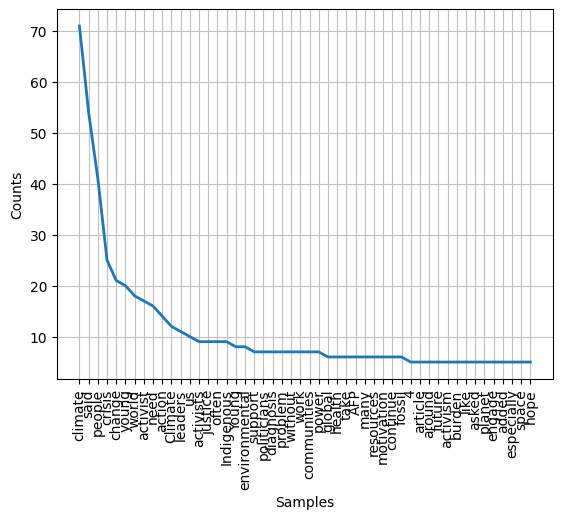

<Axes: xlabel='Samples', ylabel='Counts'>

In [ ]:
# A plot of word frequency
word_frequency.plot(50, cumulative=False)

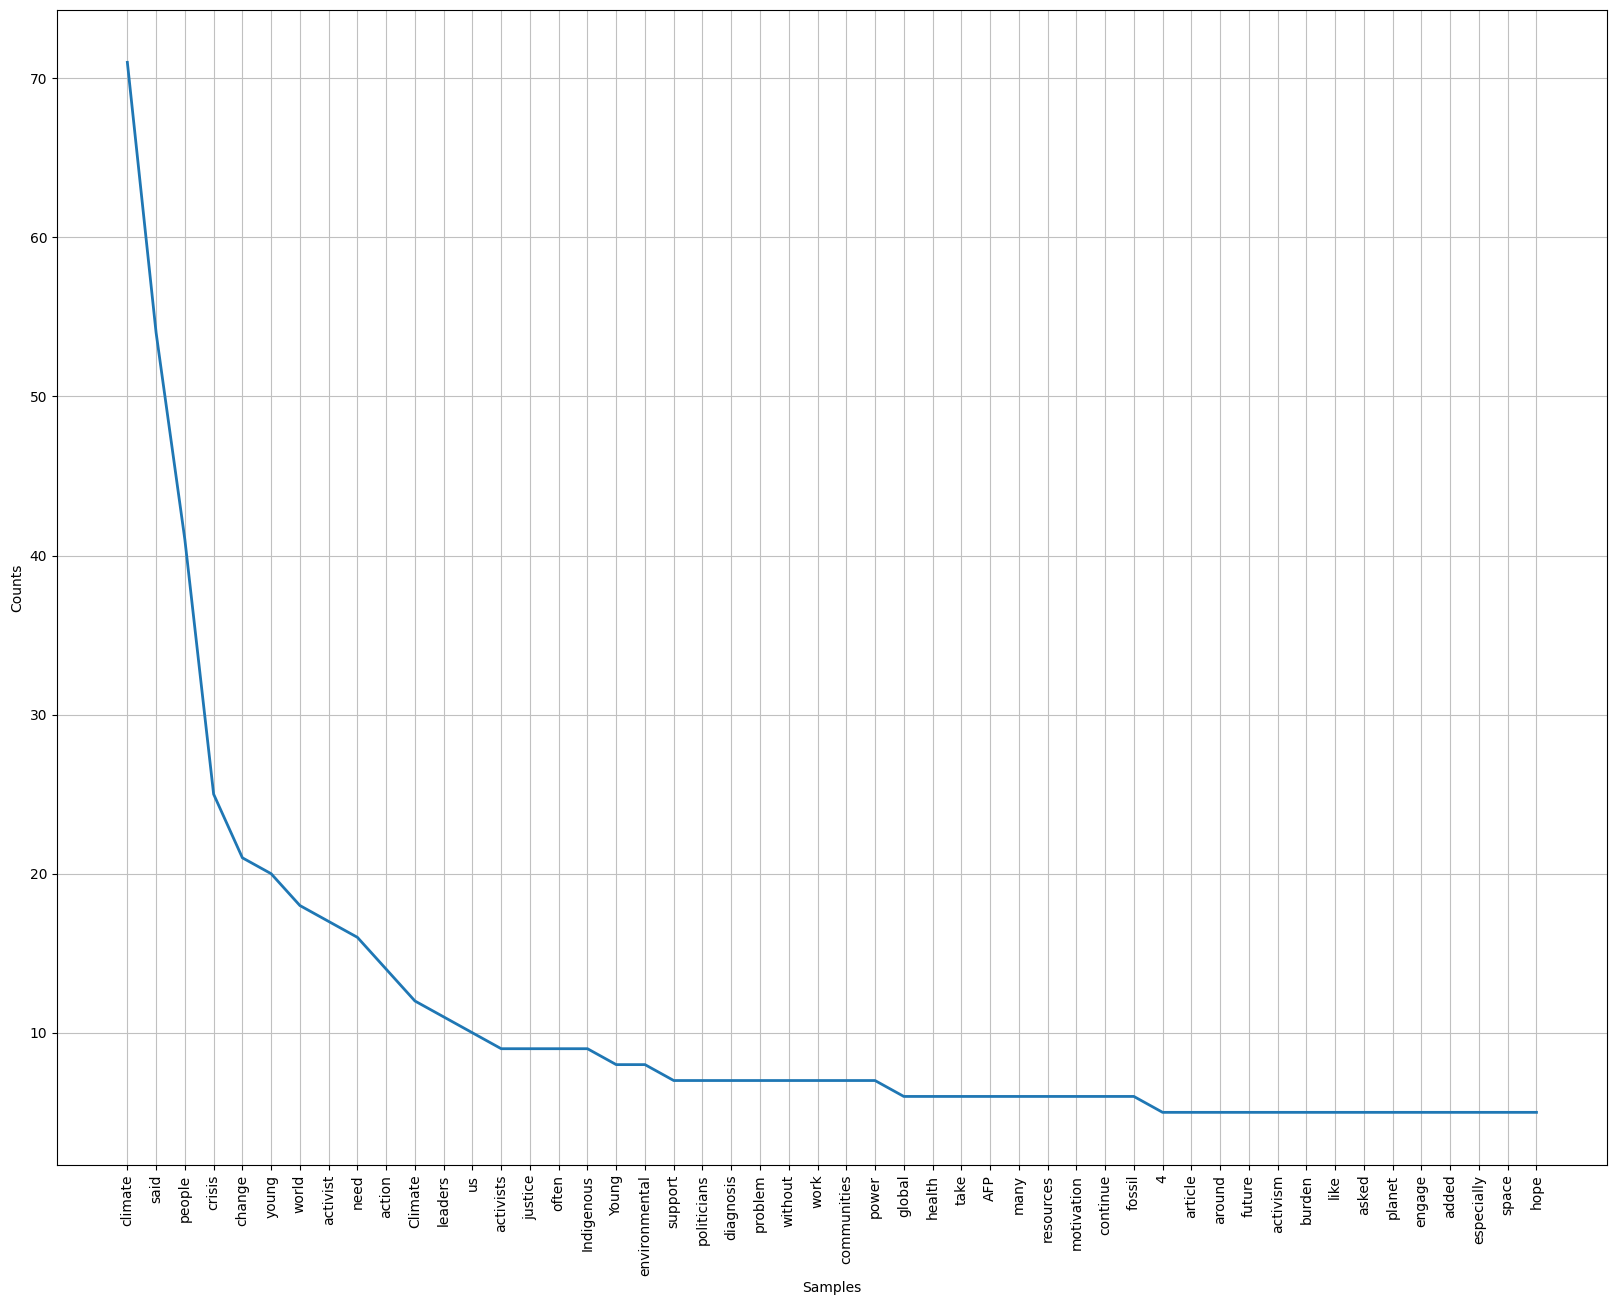

<Axes: xlabel='Samples', ylabel='Counts'>

In [ ]:
# Make the above larger
plt.figure(figsize=(20,15))
word_frequency.plot(50, cumulative=False)

In [ ]:
# Remove words that are not needed for our analysis.

justice = [w for w in justice if not w in ['4',]]

In [ ]:
justice

['Young',
 'Climate',
 'Justice',
 'Activists',
 'Fighting',
 'Collective',
 'SurvivalSubscribe',
 'newslettersSubscribe',
 'Sign',
 'InBETAThis',
 'BETA',
 'experience',
 'may',
 'clicking',
 'hereMore',
 'ForbesMay',
 '5',
 'EDTDonanemab',
 'Data',
 'Look',
 'Promising',
 'Lead',
 'Imminent',
 'Change',
 'Medicare',
 'Severe',
 'Restrictions',
 'Coverage',
 'Alzheimer',
 'Disease',
 'BiologicsMay',
 '5',
 'EDTFelled',
 'Warming',
 'World',
 'Malaria',
 'Next',
 'Pandemic',
 'May',
 '5',
 'EDTCigna',
 'Profits',
 'Eclipse',
 'Billion',
 'Adding',
 'Million',
 'New',
 'Health',
 'Plan',
 'MembersMay',
 'EDTComing',
 'Terms',
 'Healthcare',
 'Industry',
 'Inauthenticity',
 'EpidemicMay',
 'EDTAlignment',
 'Healthcare',
 'Loss',
 'Narrows',
 'Medicare',
 'Advantage',
 'Enrollment',
 'GrowsMay',
 'EDTDutch',
 'Researchers',
 'Suggest',
 'Women',
 'Consider',
 'Waiting',
 'Bit',
 'Stopping',
 'Pill',
 'Getting',
 'PregnantMay',
 'Emergency',
 'Declarations',
 'End',
 'May',
 '11',
 'Need',

In [ ]:
from wordcloud import WordCloud

In [ ]:
justice_new = (" ").join(justice)

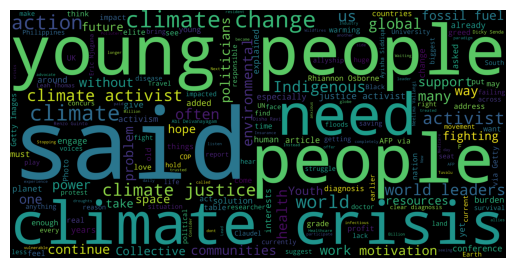

In [ ]:
wordcloud = WordCloud(width=4000, height=2000).generate(justice_new)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()